Warning: sometimes our graphs look bad because the resolution of the 
graph is poor.  This has a technical fix.  
Here are some pointers to getting graphics out of MATPLOTLIB that look good when imported into other programs.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
# imports data from Nat1988.txt which is about 810 Mb
# and KEY1988.txt which is an ad-hoc table of columns and labels
# https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat1988.zip 


In [ ]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        # Get the first column (start)
        df[column_name] = natalitydata[0].str.get(start-1)
        # Get the remaining columns
        for i in range(1, stop-start + 1):
            df[column_name]=  df[column_name].str.cat(natalitydata[0].str.get(start-1+i))
    for start, stop, column_name in datadictionary:
        df[column_name] = pd.to_numeric(df[column_name], errors="ignore")
    return df

In [ ]:
# Load in a file of three columns into a list of lists, the first two elements of which are integers.
# This is our table of column positions and column names
key1988 = []
for line in open("../data/KEY1988.txt"):
    fields = line.strip().split()
    key1988.append([int(fields[0]), int(fields[1]), fields[2]])
key1988


In [ ]:
# Read the large (215 x 3.9million cells) data file into a pandas frame 
n1988 = pd.read_csv("~/data/birth/NATL1988.txt", header=None)

In [ ]:
# 3.5 minutes
starttime=time.time()
df = parse_natality(n1988, key1988)
stoptime=time.time()
print(stoptime-starttime)
df.head()

In [46]:
df.head()

,RESIDENTSTATUS,STATEOFRESIDENCE,POPULATIONSIZECITY,SEX,ATTENDANTTYPE,RACEOFFATHER,RACEOFMOTHER,RACEOFCHILD,RACEOFCHILDRECODE3,AGEOFMOTHER,...,MONTH,DAY,DETAILGESTATIONAGE,MOTHERSEDUCATION,FATHERSEDUCATION,DETAILMARITALSTATUS,ONEMINUTEAPGAR,FIVEMINUTEAPGAR,HISPANICMOTHER,HISPANICFATHER
0,1,1,9,2,1,1,1,1,1,23,...,1,8,42,12,11,1,9,10,0,0
1,1,1,9,2,1,9,2,2,3,16,...,1,1,39,10,99,2,8,9,0,99
2,1,1,9,2,1,2,2,2,3,24,...,1,7,39,12,10,1,7,8,0,0
3,1,1,9,1,1,9,2,2,3,24,...,1,6,42,11,99,2,9,9,0,99
4,1,1,9,2,1,9,2,2,3,26,...,1,1,35,12,99,2,8,9,0,99


<Axes: >

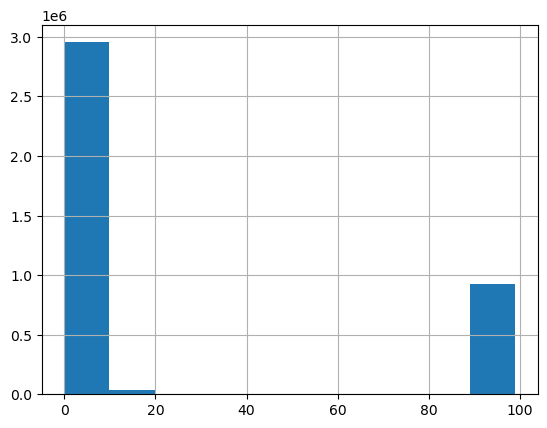

In [47]:
df.ONEMINUTEAPGAR.hist()

<Axes: >

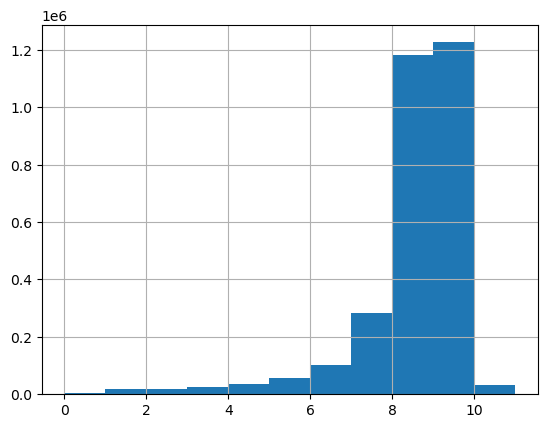

In [49]:
df.ONEMINUTEAPGAR.hist (bins = np.arange(0,12))  

<Axes: >

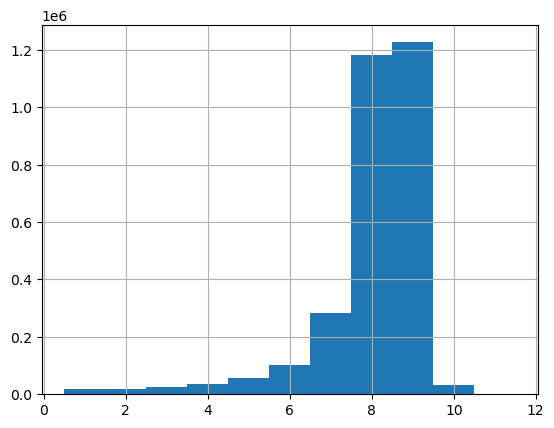

In [50]:
df.ONEMINUTEAPGAR.hist (bins = np.arange(0,12)  + 0.5)  

<Axes: >

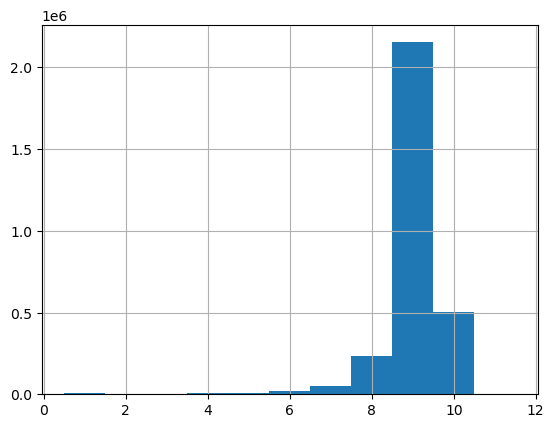

In [51]:
df.FIVEMINUTEAPGAR.hist (bins = np.arange(0,12)  + 0.5)  

In [52]:
df.ONEMINUTEAPGAR[0]

9

In [53]:
# looks like I need to groupby both ONEMINUTEAPGAR and FIVEMINUTEAPGAR
apgarapgarhist = df.groupby(["ONEMINUTEAPGAR", "FIVEMINUTEAPGAR"]).FIVEMINUTEAPGAR.count()

In [54]:
apgarapgar= np.reshape(np.array(apgarapgarhist), (12,12))
# chop off unknown apgar scores
apgarapgar = apgarapgar[0:11,0:11]

In [55]:
apgarapgar  # now it's just a numpy arary, so I don't have pandas 
# conveniences like .head()

array([[   1355,     404,     207,     162,     147,     104,      73,
             75,      89,     148,      46],
       [    741,    4699,    1109,    1324,    1624,    1915,    2298,
           2134,    2005,    1640,      80],
       [    183,     719,    1253,     747,    1339,    2089,    3011,
           3251,    3719,    3095,     140],
       [     47,     219,     276,     530,     792,    1978,    3656,
           5263,    6370,    5942,     249],
       [     13,      59,     104,     127,     444,    1215,    4209,
           7624,   11097,   11519,     400],
       [     15,      43,      80,     100,     120,     684,    3264,
          10986,   19157,   22156,     932],
       [     17,      34,      54,      78,     126,     214,    1595,
          11475,   38955,   47903,    2157],
       [     47,      39,      47,      63,      95,     215,     455,
           6028,   82434,  186829,    7623],
       [    151,      74,      69,      71,     153,     231,     410,
 

In [ ]:
df.groupby(["ONEMINUTEAPGAR"]).RESIDENTSTATUS.count().plot.bar()

<Axes: xlabel='FIVEMINUTEAPGAR'>

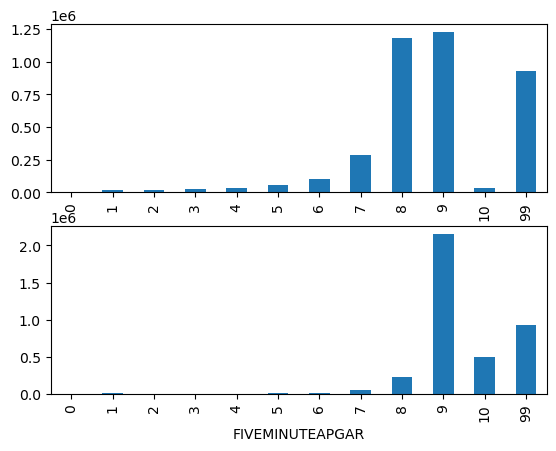

In [56]:
plt.subplot(211)
df.groupby(["ONEMINUTEAPGAR"]).RESIDENTSTATUS.count().plot.bar()
plt.subplot(212)
df.groupby(["FIVEMINUTEAPGAR"]).RESIDENTSTATUS.count().plot.bar()

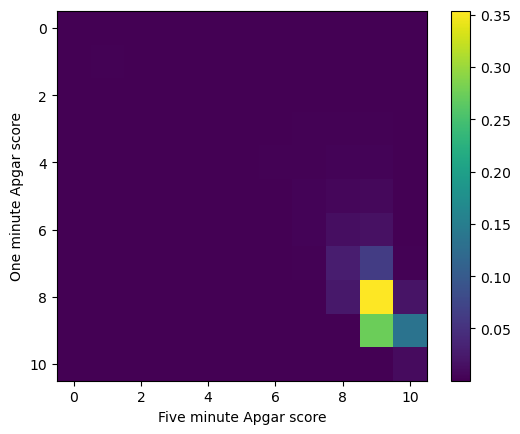

In [57]:
plt.imshow((apgarapgar/apgarapgar.sum())  )
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()


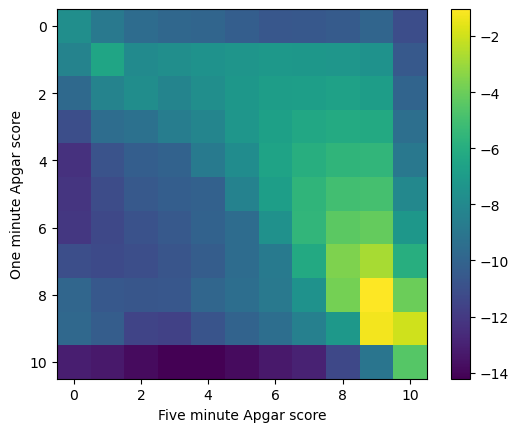

In [58]:
plt.imshow(np.log(apgarapgar/apgarapgar.sum())  )
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()

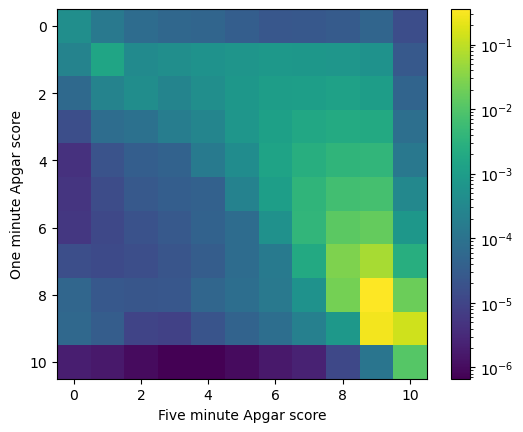

In [59]:
# Exaggerated-color scale version
#  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
#  plt.savefig() claims to support PNG, EPS, PDF, and SVG, and does support JPG
#  It stands to reason they have different optional arguments (resolution, quality, metadata)
from matplotlib.colors import LogNorm

plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()


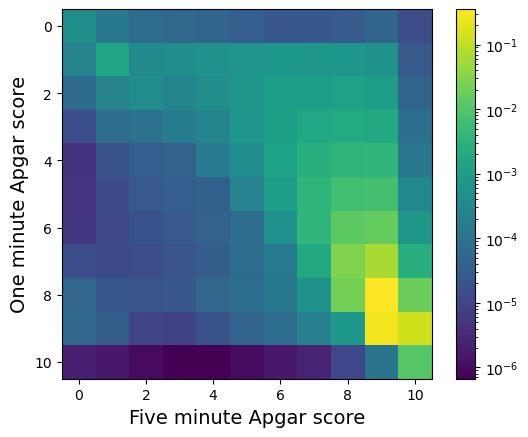

In [60]:
# first, bigger axis labels
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.colorbar()

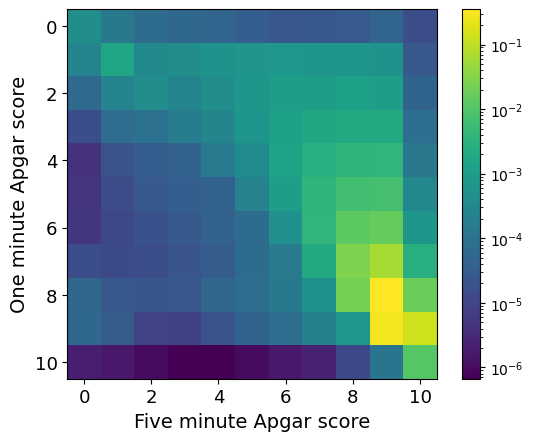

In [61]:
# Next, bigger axis tick marks
# first, bigger axis labels
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.colorbar()


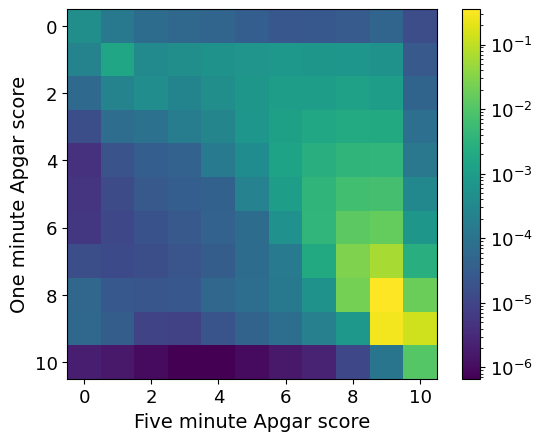

In [62]:
# Next, bigger color bar tick labels
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13) 

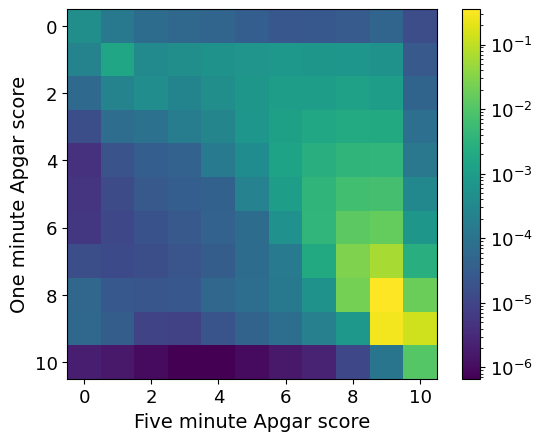

In [63]:
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13) 
plt.savefig("APGAR.png")

In [64]:
# savefig results in a below-presentation-standard graphic:
!exiftool APGAR.png
#  432 x 288 pixels!! No wonder it looks crummy.  

ExifTool Version Number         : 12.60
File Name                       : APGAR.png
Directory                       : .
File Size                       : 25 kB
File Modification Date/Time     : 2023:10:12 13:28:12-05:00
File Access Date/Time           : 2023:10:12 13:28:34-05:00
File Inode Change Date/Time     : 2023:10:12 13:28:33-05:00
File Permissions                : -rw-r--r--
File Type                       : PNG
File Type Extension             : png
MIME Type                       : image/png
Image Width                     : 640
Image Height                    : 480
Bit Depth                       : 8
Color Type                      : RGB with Alpha
Compression                     : Deflate/Inflate
Filter                          : Adaptive
Interlace                       : Noninterlaced
Software                        : Matplotlib version3.7.2, https://matplotlib.org/
Pixels Per Unit X               : 3937
Pixels Per Unit Y               : 3937
Pixel Units                     

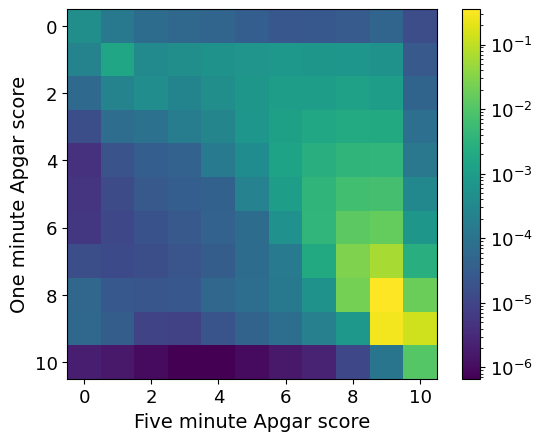

In [65]:
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13) 
plt.savefig("APGAR600.png", dpi=600)

In [66]:
!exiftool APGAR600.png

ExifTool Version Number         : 12.60
File Name                       : APGAR600.png
Directory                       : .
File Size                       : 187 kB
File Modification Date/Time     : 2023:10:12 13:30:22-05:00
File Access Date/Time           : 2023:10:12 13:30:23-05:00
File Inode Change Date/Time     : 2023:10:12 13:30:22-05:00
File Permissions                : -rw-r--r--
File Type                       : PNG
File Type Extension             : png
MIME Type                       : image/png
Image Width                     : 3840
Image Height                    : 2880
Bit Depth                       : 8
Color Type                      : RGB with Alpha
Compression                     : Deflate/Inflate
Filter                          : Adaptive
Interlace                       : Noninterlaced
Software                        : Matplotlib version3.7.2, https://matplotlib.org/
Pixels Per Unit X               : 23622
Pixels Per Unit Y               : 23622
Pixel Units             

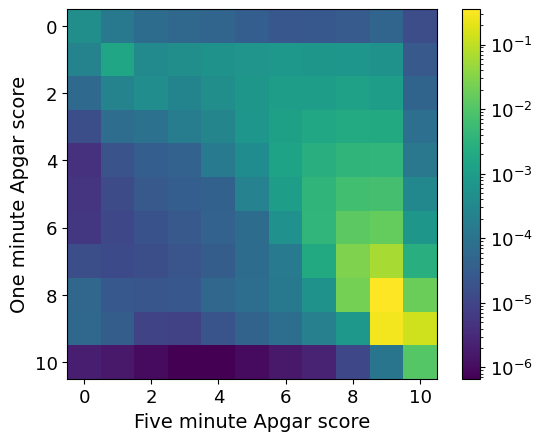

In [68]:
# Let us marginalize over output formats...
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13) 
plt.savefig("APGAR.jpg") 
plt.savefig("APGAR.pdf")
plt.savefig("APGAR.svg")
plt.savefig("APGAR.png")
plt.savefig("APGAR.eps")

In [ ]:
!ls -lh APGAR.???
# So some are bigger than others.  
# Here JPG and PNG are bitmap formats,
# EPS and PDF are container formats that *can* contain 
# vector graphics if they are created properly, and 
# SVG is a vector format that isn't widely supported.

# Why create so many files?  To check which ones I can use
# downstream.

In [ ]:
# For my presentation software, I can import EPS and SVG.
# If I was completely stuck with the bitmap formats, 
# I could improve the quality by increasing the resolution:

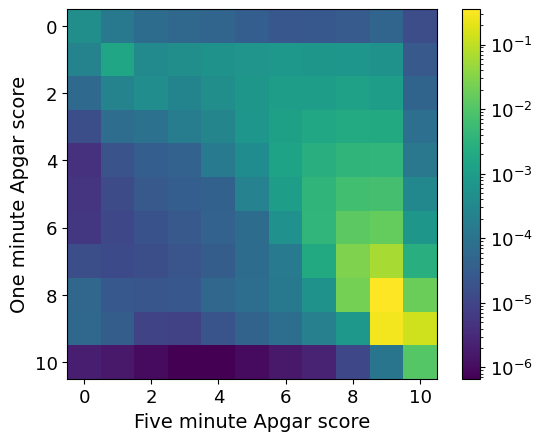

In [69]:
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13) 
plt.savefig("APGAR300.png", dpi=300)


In [ ]:
!exiftool APGAR300.png # and now it's 1800x1200 and 62kB
# It looks good enough for anywhere I am going to put it,
# but it is not infinitely zoomable like EPS or SVG.

In [ ]:
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13) 
plt.savefig("APGAR300.pdf", bbox_inches=0)
